# Spherical cap


In [1]:
## Imports and physical parameters
# std library
import numpy as np
import scipy

# plotting
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# ddg imports
# Allow for relative imports from main library:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from ddgclib import *
#from ddgclib._case1 import *
from ddgclib._complex import *
from ddgclib._curvatures import * #plot_surface#, curvature
from ddgclib._capillary_rise_flow import * #plot_surface#, curvature
from ddgclib._capillary_rise import * #plot_surface#, curvature
from ddgclib._eos import *
from ddgclib._misc import *
from ddgclib._plotting import *

# Parameters for a water droplet in air at standard laboratory conditions
gamma = 0.0728  # N/m, surface tension of water at 20 deg C
rho = 1000  # kg/m3, density
g = 9.81  # m/s2

# Parameters from EoS:
T_0 = 273.15 + 25  # K, initial tmeperature
P_0 = 101.325  # kPa, ambient pressure
#gamma = IAPWS(T_0)  # N/m, surface tension of water at 20 deg C
gamma = 0.0728  # N/m, surface tension of water at 20 deg C
#rho_0 = eos(P=P_0, T=T_0)  # kg/m3, densi
rho = 1000  # kg/m3, density
g = 9.81  # m/s2

# Capillary rise parameters
r = 2.0  # m, radius of the tube
theta_p = 0 * np.pi/180.0  # Three phase contact angle
theta_p = 20 * np.pi/180.0  # Three phase contact angle
theta_p = 50 * np.pi/180.0  # Three phase contact angle

R = r / np.cos(theta_p)  # = R at theta = 0
# Exact values:
K_f = (1 / R) ** 2
H_f = 1 / R + 1 / R  # 2 / R

def distance_matrix(A, B, squared=False):
    """
    Compute all pairwise distances between vectors in A and B.

    Parameters
    ----------
    A : np.array
        shape should be (M, K)
    B : np.array
        shape should be (N, K)

    Returns
    -------
    D : np.array
        A matrix D of shape (M, N).  Each entry in D i,j represnets the
        distance between row i in A and row j in B.

    See also
    --------
    A more generalized version of the distance matrix is available from
    scipy (https://www.scipy.org) using scipy.spatial.distance_matrix,
    which also gives a choice for p-norm.
    """
    M = A.shape[0]
    N = B.shape[0]

    assert A.shape[1] == B.shape[1], f"The number of components for vectors in A \
        {A.shape[1]} does not match that of B {B.shape[1]}!"

    A_dots = (A*A).sum(axis=1).reshape((M,1))*np.ones(shape=(1,N))
    B_dots = (B*B).sum(axis=1)*np.ones(shape=(M,1))
    D_squared =  A_dots + B_dots -2*A.dot(B.T)

    if squared == False:
        zero_mask = np.less(D_squared, 0.0)
        D_squared[zero_mask] = 0.0
        return np.sqrt(D_squared)

    return D_squared

def cotan(theta):
    return 1 / np.tan(theta)


In [2]:
F, nn, HC, bV, K_f, H_f = cap_rise_init_N(r, theta_p, gamma, N=4, refinement=0, cdist=1e-10, equilibrium=True)

Vertex cache of size: 4:
Vertex: (0.0, 0.0, -0.7279404685324046831)
Connections: (0.0, 2.0000000000000000408, 0.0) (1.732050807568877481, -0.9999999999999995939, 0.0) (-1.7320508075688767606, -1.0000000000000008948, 0.0) 
Vertex: (0.0, 2.0000000000000000408, 0.0)
Connections: (0.0, 0.0, -0.7279404685324046831) (1.732050807568877481, -0.9999999999999995939, 0.0) (-1.7320508075688767606, -1.0000000000000008948, 0.0) 
Vertex: (1.732050807568877481, -0.9999999999999995939, 0.0)
Connections: (0.0, 0.0, -0.7279404685324046831) (0.0, 2.0000000000000000408, 0.0) (-1.7320508075688767606, -1.0000000000000008948, 0.0) 
Vertex: (-1.7320508075688767606, -1.0000000000000008948, 0.0)
Connections: (0.0, 0.0, -0.7279404685324046831) (1.732050807568877481, -0.9999999999999995939, 0.0) (0.0, 2.0000000000000000408, 0.0) 


/home/stefan_endres/projects/ddg/ddgclib/ddgclib/_complex.py:2957: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


(<Figure size 640x480 with 1 Axes>, <Axes3D: >, None, None)

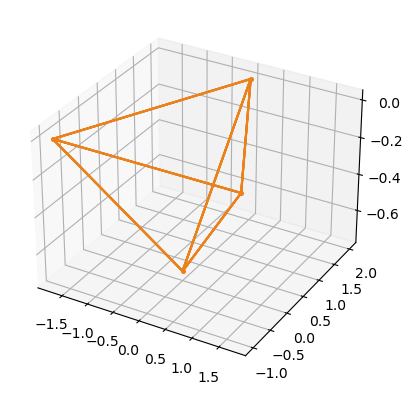

In [3]:

#plot_polyscope(HC)
HC.V.print_out()
#%matplotlib inline
#import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')
HC.plot_complex()
#plt.show()

In [14]:
v = HC.V[(0.0, 0.0, -0.7279404685324046831)]

In [15]:
v.nn

{<ddgclib._vertex.VertexCube at 0x7f013b551790>,
 <ddgclib._vertex.VertexCube at 0x7f013b5534d0>}

In [16]:
F, nn = vectorise_vnn(v)
curvature_dict = b_curvatures_hn_ij_c_ij(F, nn)
print(curvature_dict )

{'F': array([[ 0.        ,  0.        , -0.72794047],
       [ 0.        ,  2.        ,  0.        ],
       [ 1.73205081, -1.        ,  0.        ],
       [-1.73205081, -1.        ,  0.        ]], dtype=float128), 'nn': [[1, 2, 3], [2, 3], [1, 3], [2, 1]], 'n_i': array([ 0.,  0., -1.], dtype=float128), 'E_ij': array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.        ,  0.72794047],
       [ 1.73205081, -1.        ,  0.72794047],
       [-1.73205081, -1.        ,  0.72794047]], dtype=float128), 'E_jk': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.73205081e+00, -3.00000000e+00,  0.00000000e+00],
       [-3.46410162e+00, -1.30087998e-15,  0.00000000e+00],
       [ 1.73205081e+00,  3.00000000e+00,  0.00000000e+00]],
      dtype=float128), 'E_ik': array([[ 0.        ,  0.        ,  0.        ],
       [ 1.73205081, -1.        ,  0.72794047],
       [-1.73205081, -1.        ,  0.72794047],
       [ 0.        ,  2.        ,  0.72794047]], dty

In [17]:
HNdA_i = curvature_dict['HNdA_i']
C_i = np.sum(curvature_dict['C_ij'])   #(dual area)
C_i, HNdA_i, 

(4.7575033903738903622,
 array([ 2.68665298e-16, -1.78676518e-16,  3.05806423e+00], dtype=float128))

In [18]:
np.sum(HNdA_i/C_i), H_f

(0.64278760968653929825, 0.6427876096865394)

# Barycentric

In [9]:
HC.V.print_out()

Vertex cache of size: 4:
Vertex: (0.0, 0.0, -0.7279404685324046831)
Connections: (0.0, 2.0000000000000000408, 0.0) (1.732050807568877481, -0.9999999999999995939, 0.0) (-1.7320508075688767606, -1.0000000000000008948, 0.0) 
Vertex: (0.0, 2.0000000000000000408, 0.0)
Connections: (0.0, 0.0, -0.7279404685324046831) (1.732050807568877481, -0.9999999999999995939, 0.0) (-1.7320508075688767606, -1.0000000000000008948, 0.0) 
Vertex: (1.732050807568877481, -0.9999999999999995939, 0.0)
Connections: (0.0, 0.0, -0.7279404685324046831) (0.0, 2.0000000000000000408, 0.0) (-1.7320508075688767606, -1.0000000000000008948, 0.0) 
Vertex: (-1.7320508075688767606, -1.0000000000000008948, 0.0)
Connections: (0.0, 0.0, -0.7279404685324046831) (1.732050807568877481, -0.9999999999999995939, 0.0) (0.0, 2.0000000000000000408, 0.0) 


In [11]:
#v1 = HC.

In [19]:
# 
triangle1 = [(0.0, 0.0, -0.7279404685324046831), (0.0, 2.0000000000000000408, 0.0), (1.732050807568877481, -0.9999999999999995939, 0.0)]
triangle2 = [(0.0, 0.0, -0.7279404685324046831), (0.0, 2.0000000000000000408, 0.0), (-1.7320508075688767606, -1.0000000000000008948, 0.0)]
triangle3 = [(0.0, 0.0, -0.7279404685324046831), (1.732050807568877481, -0.9999999999999995939, 0.0), (-1.7320508075688767606, -1.0000000000000008948, 0.0)]
np.mean(triangle1, axis=0), np.mean(triangle2, axis=0), np.mean(triangle3, axis=0)

(array([ 0.57735027,  0.33333333, -0.24264682]),
 array([-0.57735027,  0.33333333, -0.24264682]),
 array([ 2.22044605e-16, -6.66666667e-01, -2.42646823e-01]))

In [20]:
curvature_dict['v_dual_ijl'], curvature_dict['v_dual_ijk']

(array([ 5.07779566e-16, -1.48045795e+00,  3.49744787e-01]),
 array([-1.2821142 ,  0.74022898,  0.34974479]))

In [21]:
dual_eij = np.array([ 0.57735027,  0.33333333, -0.24264682]) - np.array([-0.57735027,  0.33333333, -0.24264682])

In [22]:
f1 = np.array([0.0, 2.0000000000000000408, 0.0]) - np.array([0.0, 0.0, -0.7279404685324046831])
l_eij = np.linalg.norm(f1)
l_dual_eij = np.linalg.norm(dual_eij)
(l_dual_eij / l_eij ) * f1 

array([0.        , 1.08506358, 0.39493084])

In [23]:
dual_a_ij = 0.5 * l_dual_eij * (0.5 * l_eij)  # 1/2 * b * h , where h is only half the primary edge 
dual_a_ij

0.6144033242669664

In [24]:
 (l_dual_eij / l_eij ) * f1 /dual_a_ij, H_f

(array([0.        , 1.76604444, 0.64278761]), 0.6427876096865394)

In [25]:
0.64278761 -  0.642787609686539

3.13460923884179e-10